#**Análise de dados dos casos confirmados da COVID-19**

A análise de dados dos casos confirmados da COVID-19 é um projeto de extrema relevância, especialmente considerando o cenário global de pandemia que tem afetado países em todo o mundo. Este projeto tem como foco a investigação de cinco países-chave: Brasil, China, Itália, Estados Unidos e Índia, a fim de entender a progressão e o impacto da doença nesses locais.

---

###**Objetivos**

**Verificar a curva de acumulo de casos da COVID-19:** O primeiro objetivo deste projeto é traçar e analisar a curva de acumulação de casos confirmados da COVID-19 ao longo do tempo em cada um dos países mencionados. Isso nos permitirá identificar padrões de crescimento, picos e possíveis períodos de estabilização da doença em cada nação.

**Observar o acumulo individual nos casos confirmados de cada país:** Além de analisar as curvas de acumulação, o projeto busca aprofundar a análise individual de cada país, destacando os fatores que influenciam o crescimento de casos, como políticas de saúde, medidas de contenção e outros elementos que podem explicar as variações nos números de casos confirmados.

**Observar a comparação entre os números de infectados dos países em uma única visualização:** Este objetivo visa criar uma visualização que permita a comparação direta dos números de casos confirmados nos cinco países em um único gráfico ou painel. Isso facilitará a identificação de tendências e a avaliação do desempenho de cada país na gestão da pandemia.

---

###**Fonte de Dados**

Os dados para esta análise serão obtidos a partir do repositório público no GitHub, fornecido no seguinte link: [Repositório dos dados](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv). Este repositório é mantido pelo Centro de Ciência e Engenharia de Sistemas da Universidade Johns Hopkins e fornece informações confiáveis e atualizadas sobre casos confirmados da COVID-19 em todo o mundo.


## Configuração Inicial

In [171]:
import pandas as pd
import matplotlib.pyplot as plt

In [172]:
#Importando o dataset
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

casos_globais = pd.read_csv(url)

In [173]:
#Mostrando o dataframe
casos_globais.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


## Preparação dos dados

In [174]:
#Mostrando os tipos das colunas do dataframe
casos_globais.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
3/5/23              int64
3/6/23              int64
3/7/23              int64
3/8/23              int64
3/9/23              int64
Length: 1147, dtype: object

In [175]:
#Eliminando as colunas de latitude e longitude
casos_globais = casos_globais.drop(['Lat', 'Long'], axis=1)

In [176]:
#Mostrando o dataframe sem latitude e longitude
casos_globais.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [177]:
#Eliminando a divisão por provincias de países do dataframe
casos_globais = casos_globais.groupby('Country/Region').sum()

<ipython-input-177-97dfea6a58e7>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  casos_globais = casos_globais.groupby('Country/Region').sum()


In [178]:
casos_globais.head(2)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,0,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457


## Análise Exploratória dos dados

In [179]:
casos_globais.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,0,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,0,0,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
Andorra,0,0,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
Angola,0,0,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [180]:
#Função para plotagem de graficos de linhas
def Grafico_de_linha(data, casos, pais):
    titulo = 'Total de casos confirmados da COVID-19 no(a)'+ ' ' + pais
    plt.figure(figsize = (25,8))
    plt.ticklabel_format(style = 'plain')
    plt.xticks(rotation = 60)
    plt.title(titulo,
              position=(0.5, 1.02),
              fontdict={'family': 'sans serif',
                        'color' : 'black',
                        #'weight': 'bold',
                        'size': 18})
    plt.xlabel('Data',
               fontdict={'family': 'sans serif',
                         'color' : 'black',
                         #'weight': 'bold',
                         'size': 12})
    plt.ylabel('Número de Casos Confirmados',
               fontdict={'family': 'sans serif',
                         'color' : 'black',
                         #'weight': 'bold',
                         'size': 12})
    plt.plot(data, casos)
    plt.show()

### Brasil

Observação do acumulo individual nos casos confirmados do país

In [181]:
#Criando uma serie apenas com as informações do Brasil
casos_brasil = casos_globais.loc['Brazil']

In [182]:
casos_brasil.head()

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
Name: Brazil, dtype: int64

In [183]:
#Comprimindo o dataframe para conter apenas as informações de 10 em 10 dias
casos_brasil = casos_brasil.loc[::10]

In [184]:
#Aribuindo a listas separadas as informações de data(data) e numeros de casos confirmados por data(casos)
data_br = casos_brasil.index
casos_br = casos_brasil.values

In [185]:
#A lista 'data' recebeu os valores de index do dataframe 'casos_brasil'
data_br

Index(['1/22/20', '2/1/20', '2/11/20', '2/21/20', '3/2/20', '3/12/20',
       '3/22/20', '4/1/20', '4/11/20', '4/21/20',
       ...
       '12/7/22', '12/17/22', '12/27/22', '1/6/23', '1/16/23', '1/26/23',
       '2/5/23', '2/15/23', '2/25/23', '3/7/23'],
      dtype='object', length=115)

In [186]:
#A lista 'casos' recebeu os valores contidos no dataframe 'casos_brasil'
casos_br

array([       0,        0,        0,        0,        2,       52,
           1546,     6836,    20727,    43079,    92202,   169594,
         312761,   516137,   777707,  1106332,  1412669,  1809371,
        2124152,  2617187,  3041127,  3465378,  3850070,  4168790,
        4501587,  4751616,  5033036,  5238392,  5473540,  5655887,
        5916529,  6245773,  6633971,  7117046,  7487155,  7882143,
        8460987,  8942472,  9456500,  9873816, 10402913, 11028185,
       11709475, 12498653, 13120019, 13843594, 14381359, 15019870,
       15636709, 16285550, 16913984, 17552769, 18332493, 18802128,
       19272139, 19693277, 20034407, 20354591, 20622681, 20861571,
       21012064, 21325913, 21471963, 21603259, 21729284, 21825169,
       21948366, 22025668, 22124356, 22193480, 22227169, 22295621,
       22636359, 23766499, 25463530, 27135550, 28218180, 28846495,
       29361024, 29691641, 29978513, 30161909, 30330629, 30454499,
       30617786, 30762413, 31019038, 31417341, 31754465, 32358

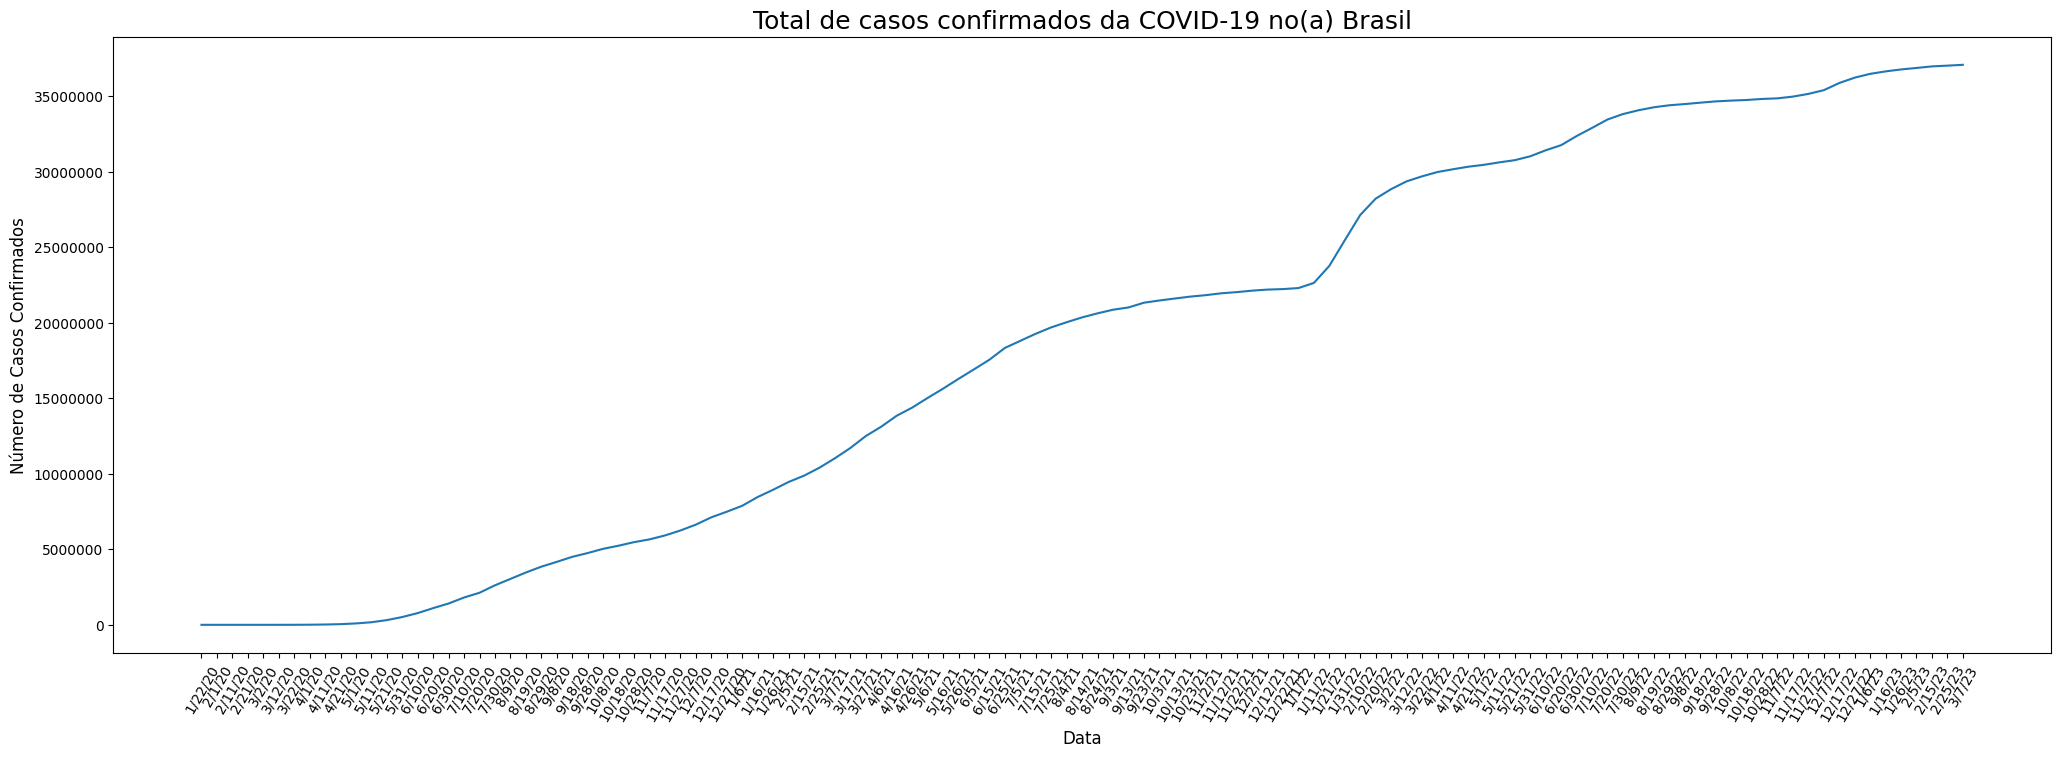

In [187]:
Grafico_de_linha(data_br, casos_br, 'Brasil')

### China

Observação do acumulo individual nos casos confirmados do país

In [188]:
casos_china = casos_globais.loc['China']

In [189]:
casos_china.describe()

count    1.143000e+03
mean     1.015579e+06
std      1.476519e+06
min      5.480000e+02
25%      9.737200e+04
50%      1.171600e+05
75%      2.094977e+06
max      4.903524e+06
Name: China, dtype: float64

In [190]:
casos_china = casos_china.loc[::10]
data_ch = casos_china.index
casos_ch = casos_china.values

In [191]:
data_ch

Index(['1/22/20', '2/1/20', '2/11/20', '2/21/20', '3/2/20', '3/12/20',
       '3/22/20', '4/1/20', '4/11/20', '4/21/20',
       ...
       '12/7/22', '12/17/22', '12/27/22', '1/6/23', '1/16/23', '1/26/23',
       '2/5/23', '2/15/23', '2/25/23', '3/7/23'],
      dtype='object', length=115)

In [192]:
casos_ch

array([    548,   11891,   44386,   75550,   80136,   80932,   81435,
         84002,   85208,   86452,   86850,   86980,   87190,   87496,
         87626,   88034,   88311,   88612,   89376,   91359,   92778,
         93720,   94236,   94621,   95056,   95452,   95875,   96322,
         96984,   97740,   98126,   98902,  100043,  101170,  102207,
        103170,  104995,  107230,  108135,  108551,  108866,  109248,
        109686,  110001,  110405,  110778,  111142,  111451,  111766,
        112113,  112503,  112943,  113394,  113771,  114236,  114853,
        115854,  117083,  117622,  118082,  118646,  119360,  119872,
        120278,  120765,  121593,  122658,  123169,  123839,  124856,
        125958,  128132,  130497,  132264,  134345,  139968,  175417,
        533295,  992569, 1249958, 1400358, 1626085, 1869000, 2024284,
       2072376, 2089569, 2096684, 2103227, 2115561, 2134718, 2164305,
       2203789, 2255689, 2304661, 2382169, 2476316, 2594190, 2689291,
       2747530, 2799

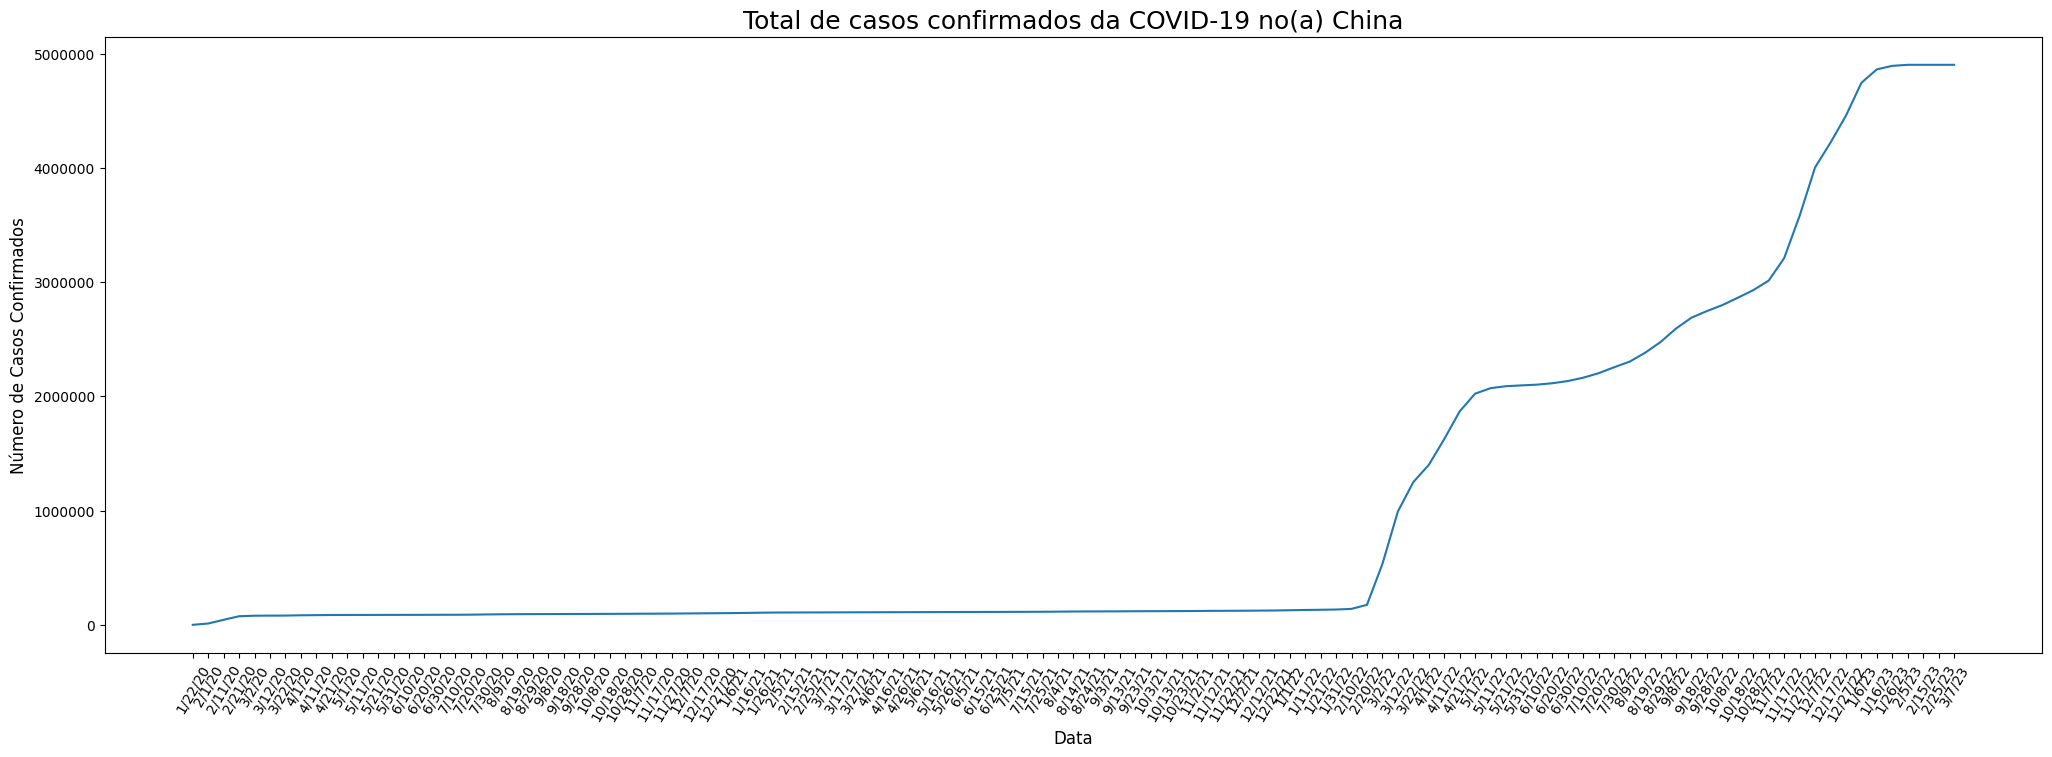

In [193]:
Grafico_de_linha(data_ch, casos_ch, 'China')

### Itália

Observação do acumulo individual nos casos confirmados do país

In [194]:
casos_italia = casos_globais.loc['Italy']
casos_italia = casos_italia.loc[::10]
data_it = casos_italia.index
casos_it = casos_italia.values

In [195]:
data_it

Index(['1/22/20', '2/1/20', '2/11/20', '2/21/20', '3/2/20', '3/12/20',
       '3/22/20', '4/1/20', '4/11/20', '4/21/20',
       ...
       '12/7/22', '12/17/22', '12/27/22', '1/6/23', '1/16/23', '1/26/23',
       '2/5/23', '2/15/23', '2/25/23', '3/7/23'],
      dtype='object', length=115)

In [196]:
casos_it

array([       0,        2,        3,       20,     2036,    15113,
          59138,   110574,   152271,   183957,   207428,   219814,
         228006,   232997,   235763,   238275,   240578,   242639,
         244624,   247158,   250566,   255278,   266853,   280153,
         294932,   311364,   338398,   414241,   589766,   902490,
        1238072,  1538217,  1742557,  1906377,  2047696,  2201945,
        2368733,  2485956,  2611659,  2729223,  2868435,  3067486,
        3281810,  3512453,  3686707,  3842079,  3971114,  4082198,
        4159122,  4201827,  4230153,  4247032,  4256451,  4263797,
        4278319,  4317415,  4369964,  4435008,  4494857,  4559970,
        4609205,  4649906,  4682034,  4707087,  4737462,  4777614,
        4843957,  4932091,  5060430,  5225517,  5472469,  6266939,
        7774863,  9603856, 10983116, 11923631, 12469975, 12867918,
       13323179, 13992092, 14719394, 15320753, 15934437, 16504791,
       16915301, 17229263, 17421410, 17611607, 17896065, 18523

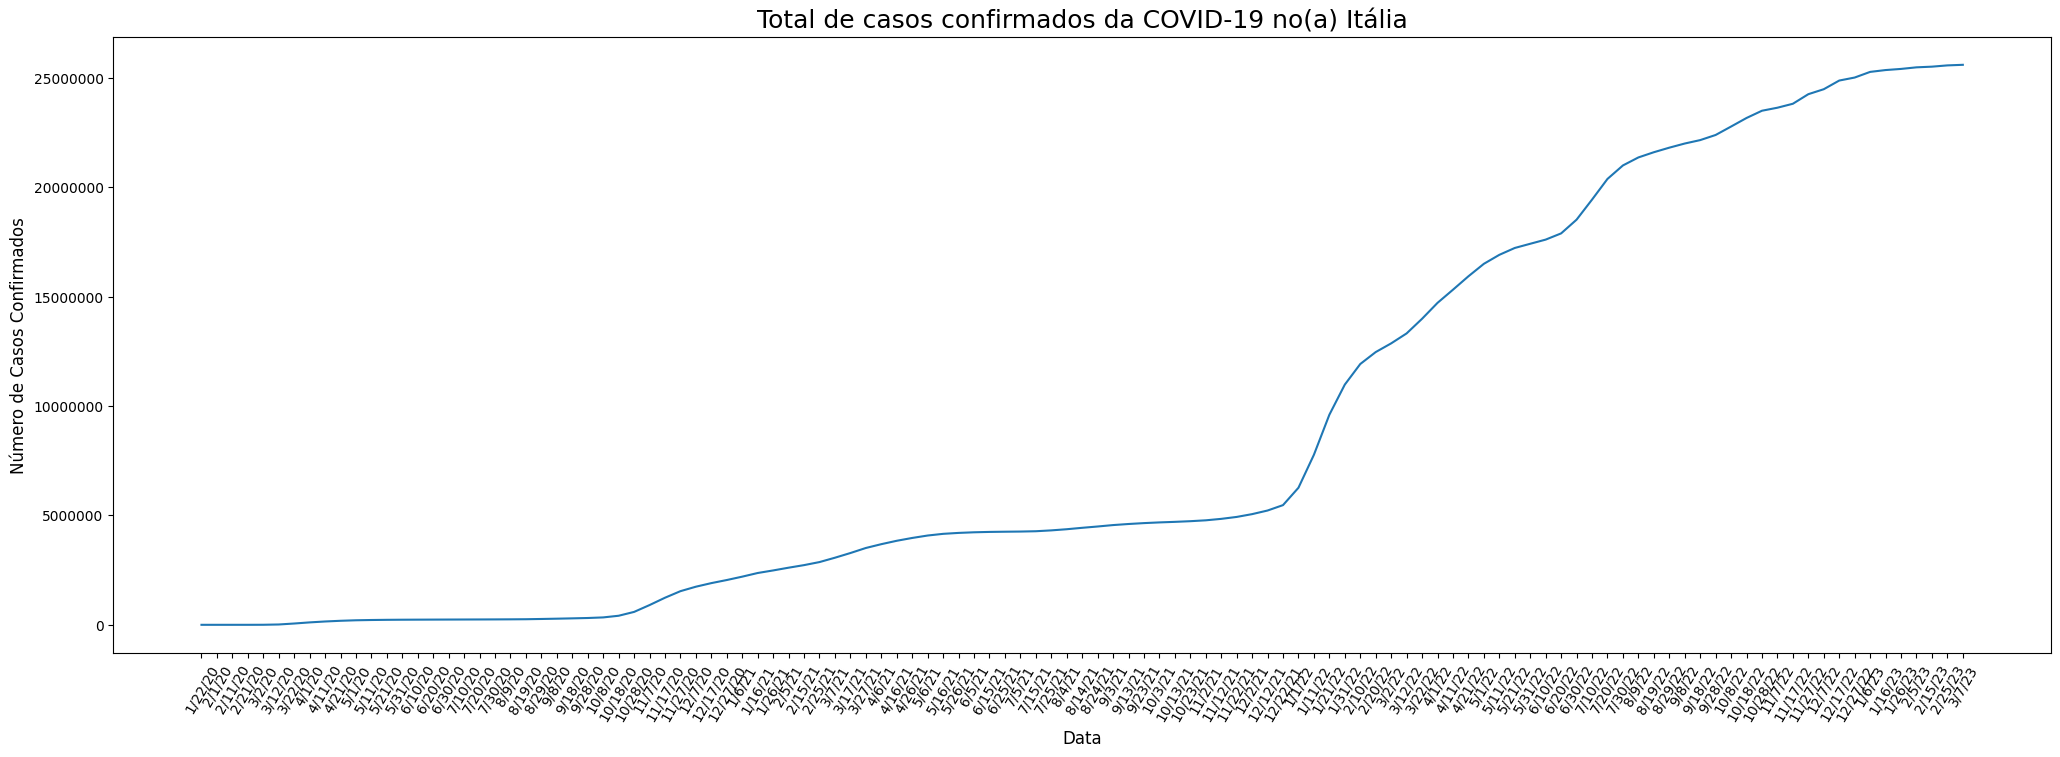

In [197]:
Grafico_de_linha(data_it, casos_it, 'Itália')

### Estados Unidos

Observação do acumulo individual nos casos confirmados do país

In [198]:
casos_estados_unidos = casos_globais.loc['US']
casos_estados_unidos = casos_estados_unidos.loc[::10]
data_us = casos_estados_unidos.index
casos_us = casos_estados_unidos.values

In [199]:
data_us

Index(['1/22/20', '2/1/20', '2/11/20', '2/21/20', '3/2/20', '3/12/20',
       '3/22/20', '4/1/20', '4/11/20', '4/21/20',
       ...
       '12/7/22', '12/17/22', '12/27/22', '1/6/23', '1/16/23', '1/26/23',
       '2/5/23', '2/15/23', '2/25/23', '3/7/23'],
      dtype='object', length=115)

In [200]:
casos_us

array([        1,         8,        13,        16,        55,      1586,
           34944,    227903,    545693,    825478,   1115972,   1356283,
         1583542,   1791547,   1999224,   2254073,   2648797,   3194746,
         3828458,   4484122,   5048871,   5549913,   5978795,   6346567,
         6755145,   7164994,   7619507,   8171010,   8896402,   9953780,
        11444297,  13202222,  15112614,  17352824,  19305730,  21551825,
        23965033,  25608948,  26979744,  27880161,  28566889,  29178094,
        29721741,  30334846,  30964189,  31697732,  32244759,  32726689,
        33064172,  33311455,  33474770,  33601271,  33732043,  33845569,
        34097162,  34581897,  35460776,  36798001,  38252484,  39999770,
        41385902,  42748318,  43790462,  44764567,  45513139,  46233294,
        47058876,  47934950,  48881253,  49992874,  51613682,  55099948,
        62709985,  70450244,  75244152,  77613413,  78625816,  79281474,
        79641006,  79930050,  80252748,  80556687, 

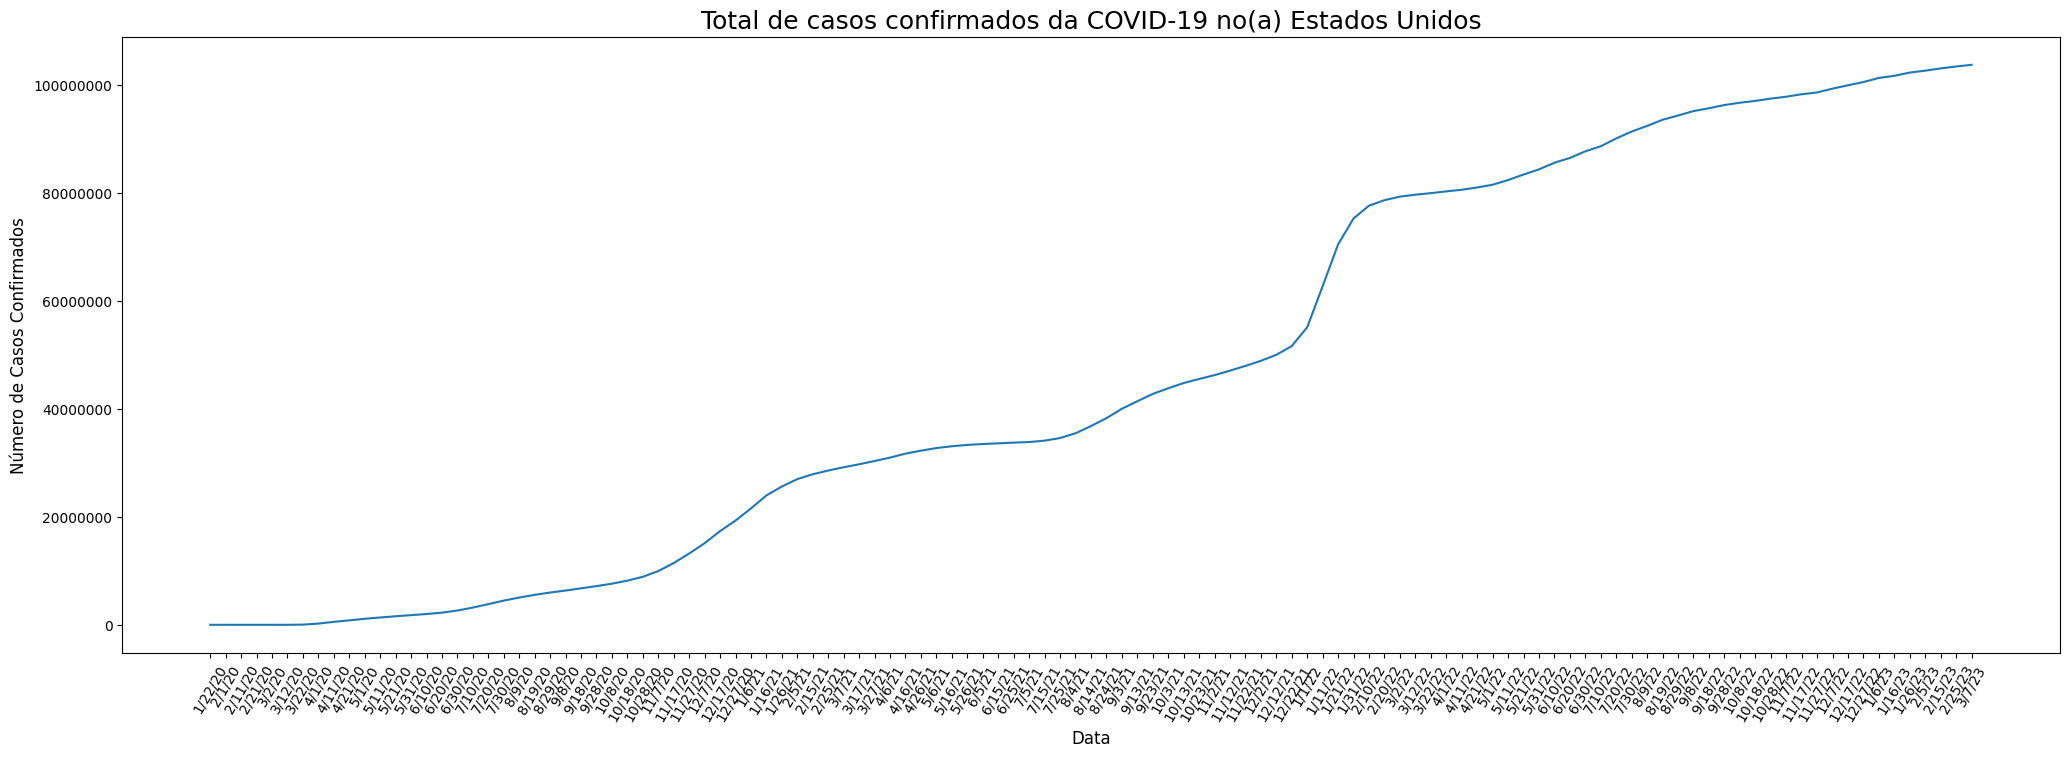

In [201]:
Grafico_de_linha(data_us, casos_us, 'Estados Unidos')

### Índia

Observação do acumulo individual nos casos confirmados do país

In [202]:
casos_india = casos_globais.loc['India']
casos_india = casos_india.loc[::10]
data_id = casos_india.index
casos_id = casos_india.values

In [203]:
casos_id

array([       0,        1,        3,        3,        5,       73,
            396,     1998,     8446,    20080,    37257,    70768,
         118226,   190609,   286605,   410451,   585481,   820916,
        1155338,  1634746,  2215074,  2836925,  3542733,  4370128,
        5308014,  6145291,  6906151,  7550273,  8040203,  8507754,
        8912907,  9351109,  9703770,  9979447, 10207871, 10395278,
       10557985, 10689527, 10814304, 10925710, 11063491, 11229398,
       11474605, 11971624, 12801785, 14526609, 17636186, 21491598,
       24965463, 27369093, 28809339, 29633105, 30183143, 30619932,
       31026829, 31411262, 31812114, 32192576, 32512366, 32945907,
       33289579, 33594803, 33834702, 34020730, 34175468, 34308140,
       34426036, 34526480, 34615757, 34697860, 34765976, 34889132,
       36070510, 38903731, 41469499, 42536137, 42838524, 42945160,
       42990991, 43012749, 43027035, 43036928, 43052425, 43082345,
       43113413, 43136371, 43160832, 43213435, 43319396, 43469

In [204]:
data_id

Index(['1/22/20', '2/1/20', '2/11/20', '2/21/20', '3/2/20', '3/12/20',
       '3/22/20', '4/1/20', '4/11/20', '4/21/20',
       ...
       '12/7/22', '12/17/22', '12/27/22', '1/6/23', '1/16/23', '1/26/23',
       '2/5/23', '2/15/23', '2/25/23', '3/7/23'],
      dtype='object', length=115)

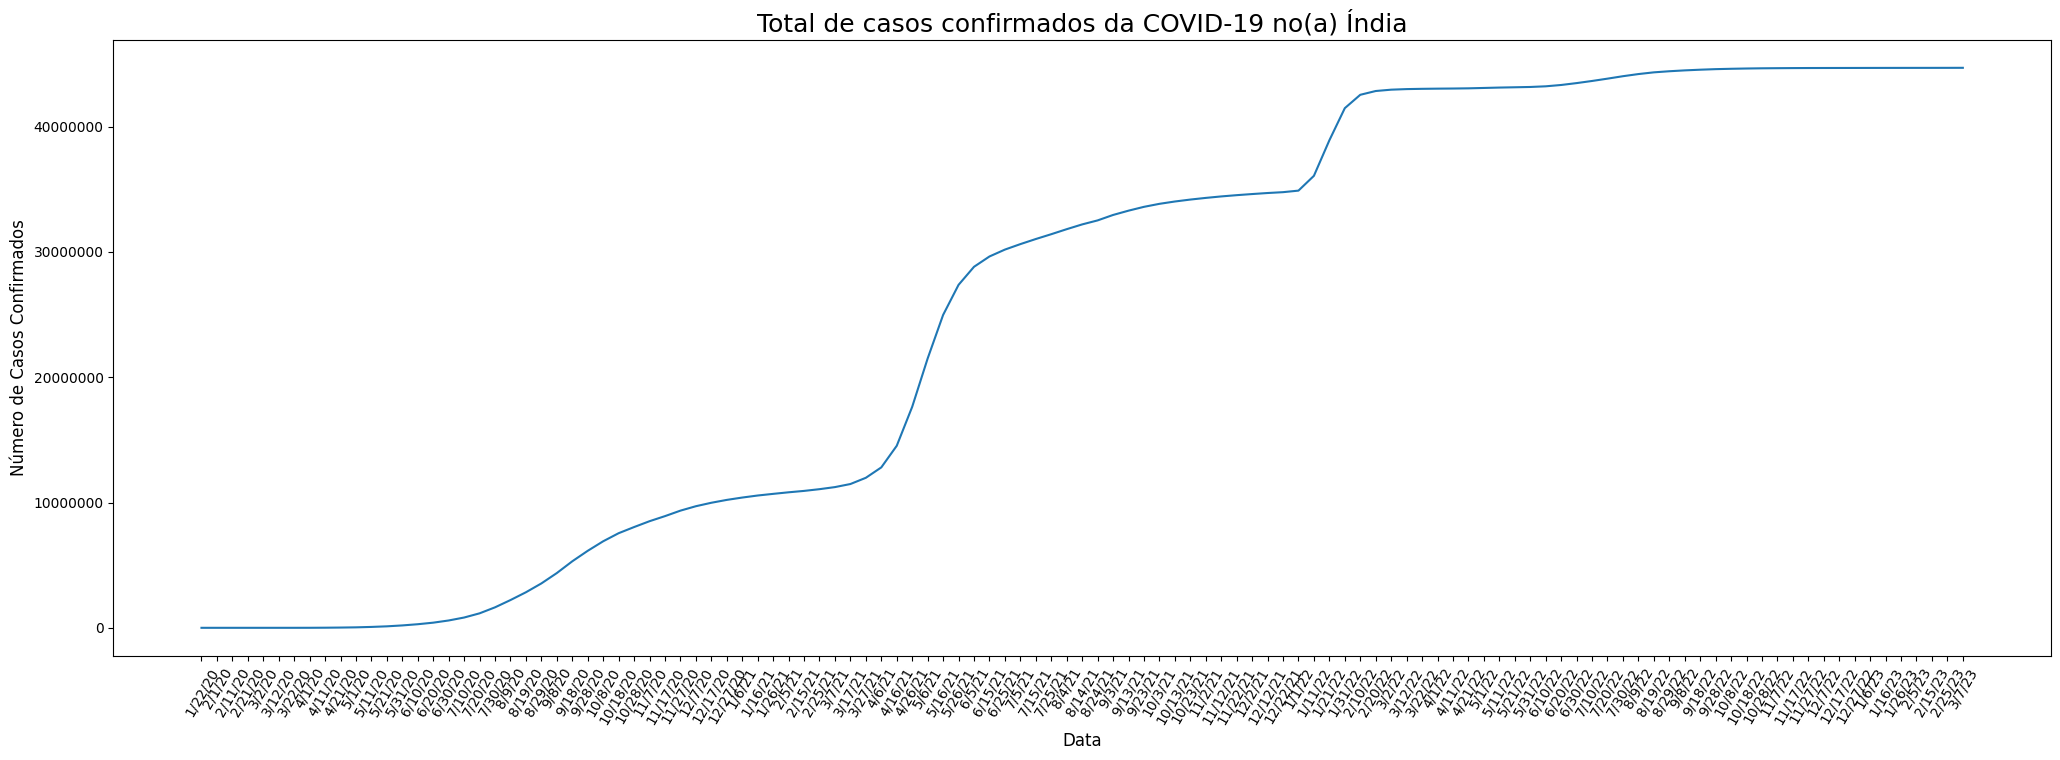

In [205]:
Grafico_de_linha(data_id, casos_id, 'Índia')

## Comparando os países

Observando a comparação entre os números de infectados dos países em uma única visualização

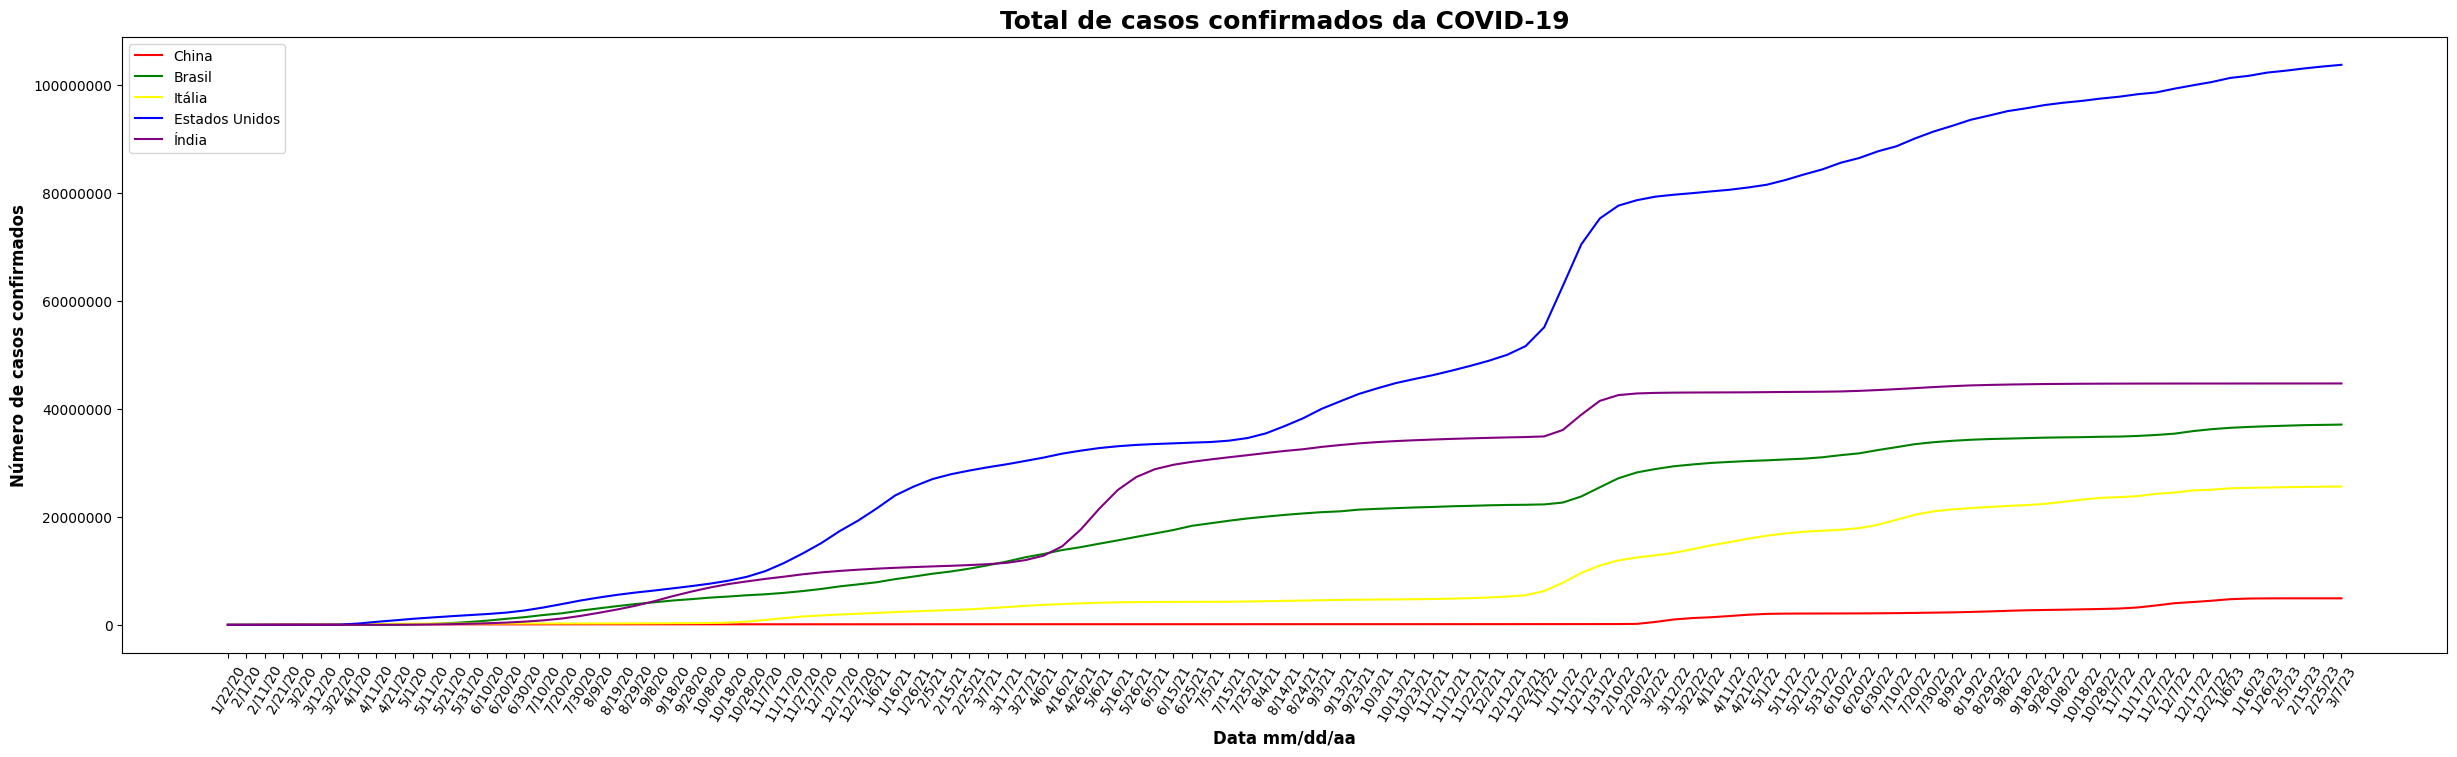

In [206]:
plt.figure(figsize = (30,8))
plt.ticklabel_format(style = 'plain')
plt.xticks(rotation = 60)
plt.title('Total de casos confirmados da COVID-19',
          position=(0.5, 1.02),
          fontdict={'family': 'sans serif',
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18})
plt.xlabel('Data mm/dd/aa',
           fontdict={'family': 'sans serif',
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 12})
plt.ylabel('Número de casos confirmados',
           fontdict={'family': 'sans serif',
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 12})
plt.plot(data_ch, casos_ch, color = 'red')
plt.plot(casos_br, color = 'green')
plt.plot(casos_it, color = 'yellow')
plt.plot(casos_us, color = 'blue')
plt.plot(casos_id, color = 'purple')
plt.legend(['China', 'Brasil', 'Itália', 'Estados Unidos', 'Índia'])
plt.show()